In [1]:
from tensorflow.keras.datasets import imdb
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.metrics import binary_accuracy
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import load_model

# import the data 
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results
    
x_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

model = Sequential()
model.add(Dense(16, activation="relu", input_shape=(10000,)))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer=RMSprop(lr=0.001), loss=binary_crossentropy, metrics=[binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 3s 100ms/step - loss: 0.5282 - binary_accuracy: 0.7879 - val_loss: 0.4161 - val_binary_accuracy: 0.8431
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3251 - binary_accuracy: 0.9011 - val_loss: 0.3171 - val_binary_accuracy: 0.8891
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2372 - binary_accuracy: 0.9259 - val_loss: 0.2947 - val_binary_accuracy: 0.8849
Epoch 4/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1893 - binary_accuracy: 0.9395 - val_loss: 0.2756 - val_binary_accuracy: 0.8907
Epoch 5/20
30/30 [==============================] - 1s 46ms/step - loss: 0.1543 - binary_accuracy: 0.9519 - val_loss: 0.3031 - val_binary_accuracy: 0.8777
Epoch 6/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1276 - binary_accuracy: 0.9623 - val_loss: 0.2885 - val_binary_accuracy: 0.8883
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - lo

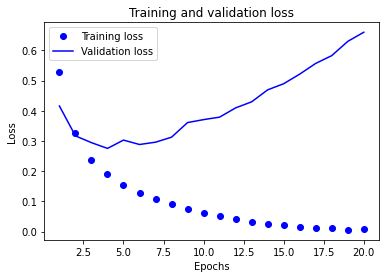

In [6]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

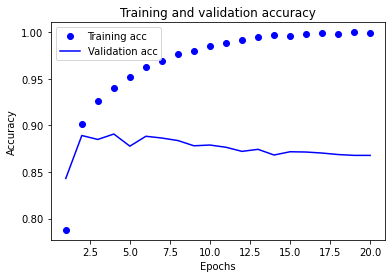

In [13]:
plt.clf()
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
model = Sequential()
model.add(Dense(16, activation="relu", input_shape=(10000, )))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer=RMSprop(lr=0.001), loss=binary_crossentropy, metrics=[binary_accuracy])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(X_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 16ms/step - loss: 0.4404 - binary_accuracy: 0.8220
Epoch 2/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2553 - binary_accuracy: 0.9088
Epoch 3/4
49/49 [==============================] - 1s 15ms/step - loss: 0.1965 - binary_accuracy: 0.9297
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3273 - binary_accuracy: 0.8723


In [17]:
predictions = model.predict(X_test)

In [18]:
print(predictions)

[[0.14754108]
 [0.99953794]
 [0.515978  ]
 ...
 [0.09147451]
 [0.04527607]
 [0.34443432]]


In [19]:
print(predictions[0])

[0.14754108]


In [22]:
print(predictions.mean())

0.43583226


In [23]:
print(results)

[0.3272521495819092, 0.8722800016403198]
